## 8. Cluster Analysis

In [1]:
import os
os.chdir("C:\\Users\\datam\\OneDrive\\Desktop\\python") # change as needed

# Verify the change
os.getcwd()

'C:\\Users\\datam\\OneDrive\\Desktop\\python'

In [4]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import cluster_tools as ct  # For Gower distance
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Cell 2: Load and Prepare Data
# Using the wine dataset from sklearn as equivalent to R's HDclassif wine data
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=[
    'Alcohol', 'MalicAcid', 'Ash', 'Alk_ash', 'magnesium', 'T_phenols',
    'Flavanoids', 'Non_flav', 'Proantho', 'C_Intensity', 'Hue',
    'OD280_315', 'Proline'
])
wine_df['Class'] = wine.target
wine_df.head()

,Alcohol,MalicAcid,Ash,Alk_ash,magnesium,T_phenols,Flavanoids,Non_flav,Proantho,C_Intensity,Hue,OD280_315,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
wine_df['Class'].value_counts()

Class
1    71
0    59
2    48
Name: count, dtype: int64

In [11]:
# Scale the features (excluding Class)
scaler = StandardScaler()
wine_scaled = pd.DataFrame(scaler.fit_transform(wine_df.drop('Class', axis=1)),
                          columns=wine_df.columns[:-1])
wine_scaled.head()

,Alcohol,MalicAcid,Ash,Alk_ash,magnesium,T_phenols,Flavanoids,Non_flav,Proantho,C_Intensity,Hue,OD280_315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
wine_scaled.describe()

,Alcohol,MalicAcid,Ash,Alk_ash,magnesium,T_phenols,Flavanoids,Non_flav,Proantho,C_Intensity,Hue,OD280_315,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [13]:
# Cell 3: Complete Linkage Hierarchical Clustering
complete_linkage = linkage(wine_scaled, method='complete', metric='euclidean')

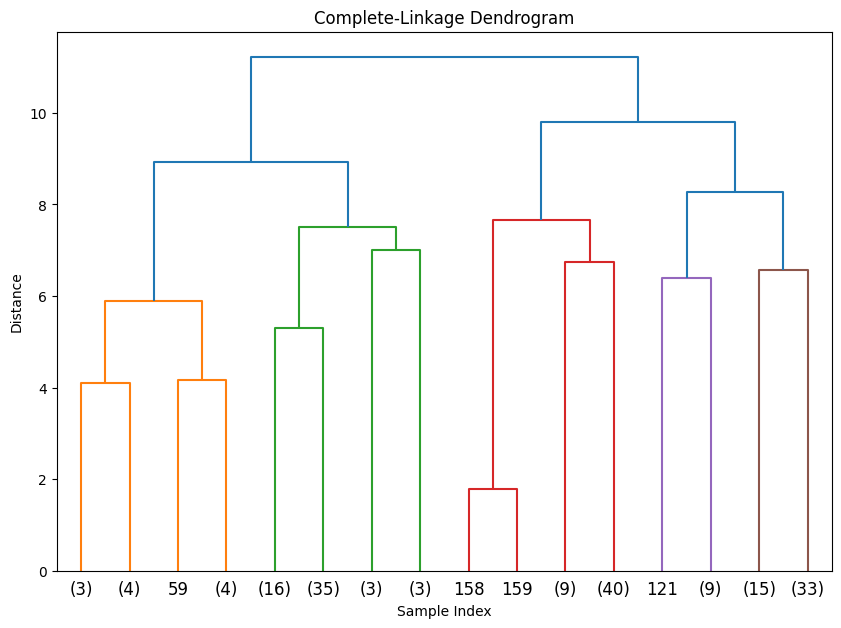

In [14]:
# Plot dendrogram
## Review interactive options for dendogram
plt.figure(figsize=(10, 7))
dendrogram(complete_linkage, truncate_mode='level', p=3)
plt.title('Complete-Linkage Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [15]:
complete_clust = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
complete_labels = complete_clust.fit_predict(wine_scaled)

# Cross-tabulation with true classes
print(pd.crosstab(complete_labels, wine_df['Class'], rownames=['Complete Clusters']))

Class               0   1   2
Complete Clusters            
0                  51  18   0
1                   8  50   0
2                   0   3  48


In [16]:
# Cell 4: Ward's Method Hierarchical Clustering
ward_linkage = linkage(wine_scaled, method='ward', metric='euclidean')

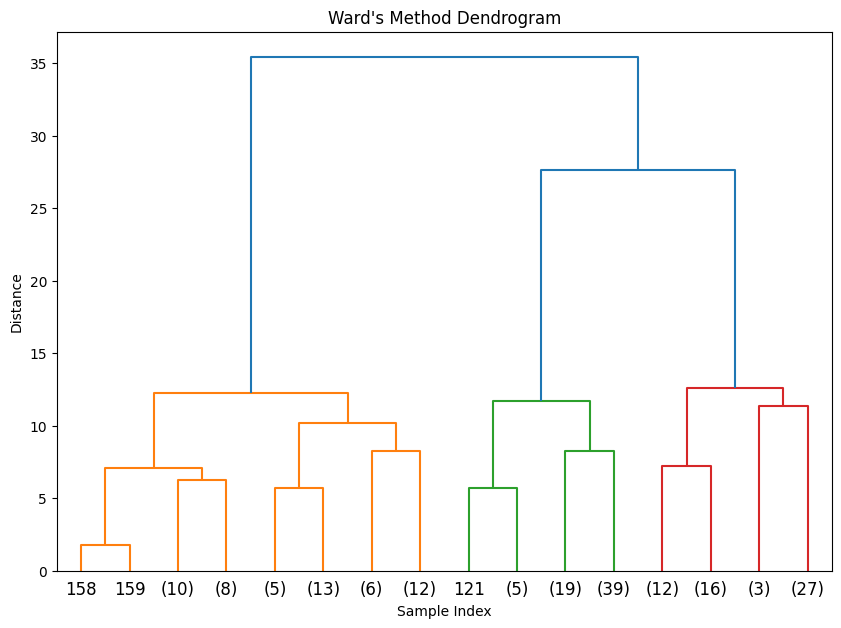

In [17]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(ward_linkage, truncate_mode='level', p=3)
plt.title('Ward\'s Method Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [18]:
ward_clust = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
ward_labels = ward_clust.fit_predict(wine_scaled)

# Cross-tabulation
print(pd.crosstab(ward_labels, wine_df['Class'], rownames=['Ward Clusters']))

Class           0   1   2
Ward Clusters            
0               0  58   0
1               0   8  48
2              59   5   0


In [19]:
# Cell 5: K-Means Clustering with Elbow Method
inertias = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=25)
    kmeans.fit(wine_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(wine_scaled, kmeans.labels_))

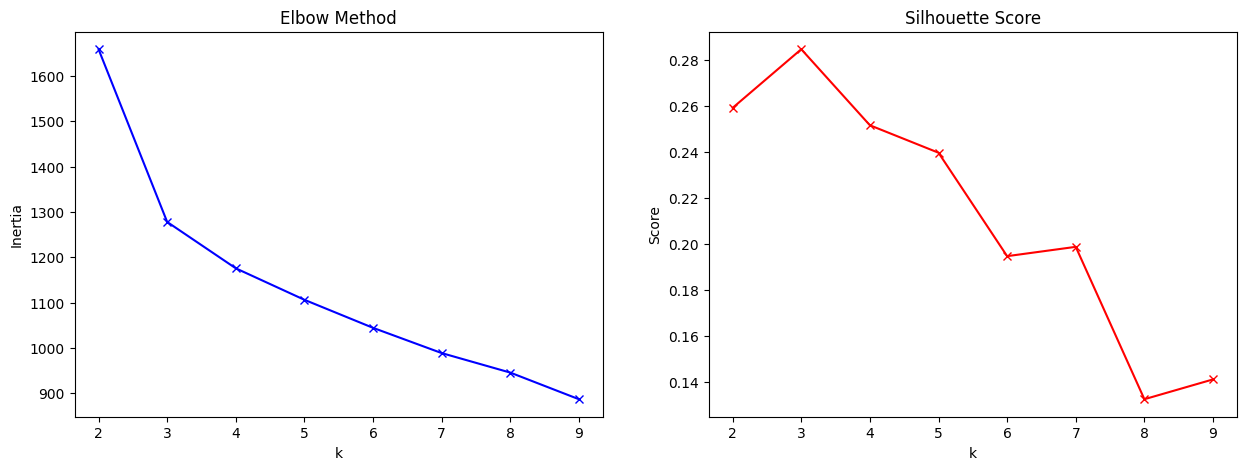

In [20]:
# Plot Elbow curve and Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(K, inertias, 'bx-')
ax1.set_title('Elbow Method')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')

ax2.plot(K, silhouette_scores, 'rx-')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('k')
ax2.set_ylabel('Score')
plt.show()

In [21]:
# Final K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=1234, n_init=25)
kmeans_labels = kmeans.fit_predict(wine_scaled)

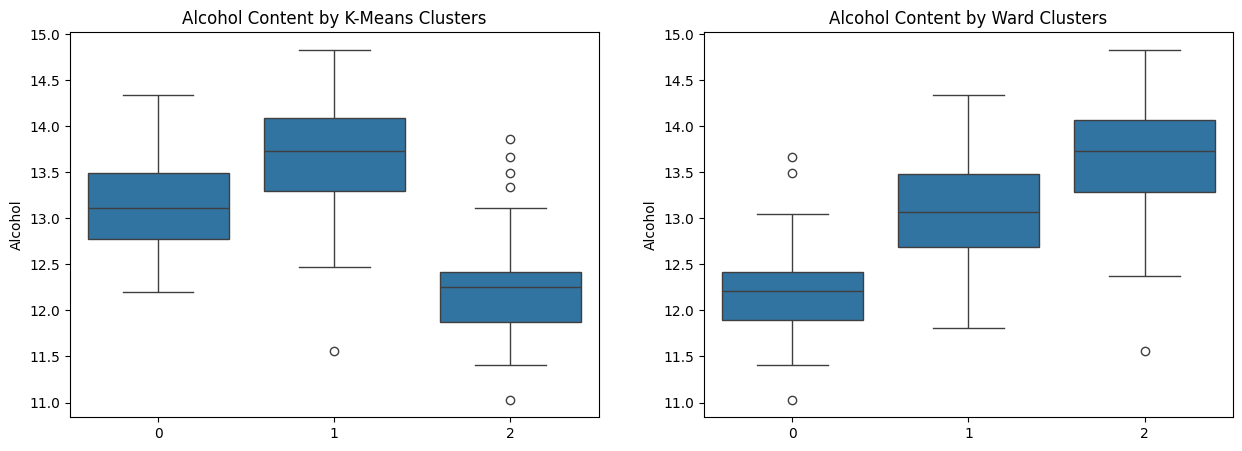

In [22]:
# Cell 6: Visualization with Boxplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=kmeans_labels, y=wine_df['Alcohol'], ax=ax1)
ax1.set_title('Alcohol Content by K-Means Clusters')

sns.boxplot(x=ward_labels, y=wine_df['Alcohol'], ax=ax2)
ax2.set_title('Alcohol Content by Ward Clusters')
plt.show()

In [23]:
# Cell 7: Gower Distance with PAM Clustering
# First, install the gower package if needed: !pip install gower
import gower
from sklearn_extra.cluster import KMedoids  # Need to install: !pip install scikit-learn-extra

In [26]:
# Verify the columns we're working with
working_df = wine_df.drop(['Class', 'Alcohol'], axis=1)
print("Columns in working_df:", working_df.columns.tolist())
print("Number of columns:", len(working_df.columns))

Columns in working_df: ['MalicAcid', 'Ash', 'Alk_ash', 'magnesium', 'T_phenols', 'Flavanoids', 'Non_flav', 'Proantho', 'C_Intensity', 'Hue', 'OD280_315', 'Proline', 'Alcohol_cat']
Number of columns: 13


In [27]:
# Ensure Alcohol_cat is properly created
wine_df['Alcohol_cat'] = pd.cut(wine_df['Alcohol'], 
                              bins=[wine_df['Alcohol'].min()-1, 
                                    wine_df['Alcohol'].mean(), 
                                    wine_df['Alcohol'].max()+1], 
                              labels=['Low', 'High'])

In [28]:
# Create the correct categorical features mask
# All False except for Alcohol_cat at the end
cat_features = [False] * (len(working_df.columns) - 1) + [True]
print("Length of cat_features:", len(cat_features))
print("cat_features:", cat_features)

Length of cat_features: 13
cat_features: [False, False, False, False, False, False, False, False, False, False, False, False, True]


In [29]:
# Calculate Gower distance matrix
gower_dist = gower.gower_matrix(working_df,
                              cat_features=cat_features)

In [30]:
# Perform PAM clustering
np.random.seed(123)
pam = KMedoids(n_clusters=3, metric='precomputed', random_state=123)
pam_labels = pam.fit_predict(gower_dist)

In [34]:
# Calculate t-SNE for visualization
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(wine_scaled)  # Using wine_scaled from earlier scaling

In [31]:
# Cross-tabulations
print("\nPAM Clustering vs True Class:")
print(pd.crosstab(pam_labels, wine_df['Class'], rownames=['PAM Clusters']))


PAM Clustering vs True Class:
Class          0   1   2
PAM Clusters            
0             17   5  20
1              1  64  25
2             41   2   3


In [32]:
print("\nPAM Clustering vs Alcohol Category:")
print(pd.crosstab(pam_labels, wine_df['Alcohol_cat'], rownames=['PAM Clusters']))


PAM Clustering vs Alcohol Category:
Alcohol_cat   Low  High
PAM Clusters           
0               1    41
1              85     5
2               0    46


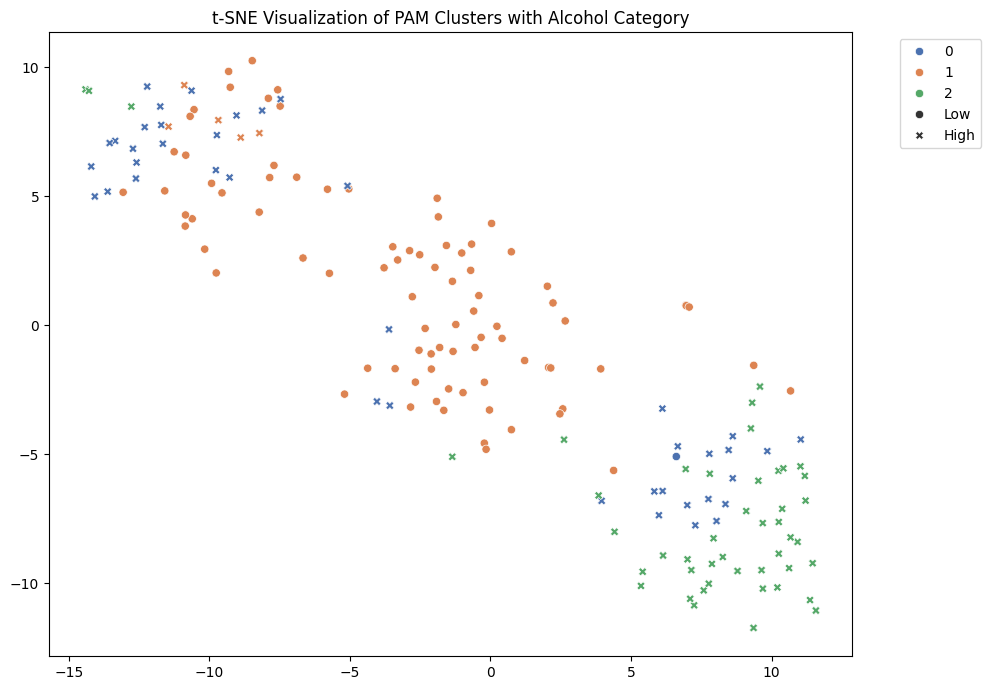

In [35]:
# Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0], 
                y=tsne_results[:, 1], 
                hue=pam_labels, 
                style=wine_df['Alcohol_cat'],
                palette='deep')
plt.title('t-SNE Visualization of PAM Clusters with Alcohol Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Random Forest Proximity-based Clustering
rf = RandomForestClassifier(n_estimators=2000, random_state=1918)
rf.fit(wine_scaled, wine_df['Class'])
proximity = rf.predict_proba(wine_scaled)
rf_dist = np.sqrt(1 - proximity.dot(proximity.T))

pam_rf = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
pam_rf_labels = pam_rf.fit_predict(rf_dist)

print(pd.crosstab(pam_rf_labels, wine_df['Class'], rownames=['RF Clusters']))

Class         0   1   2
RF Clusters            
0             0  71   0
1             0   0  48
2            59   0   0


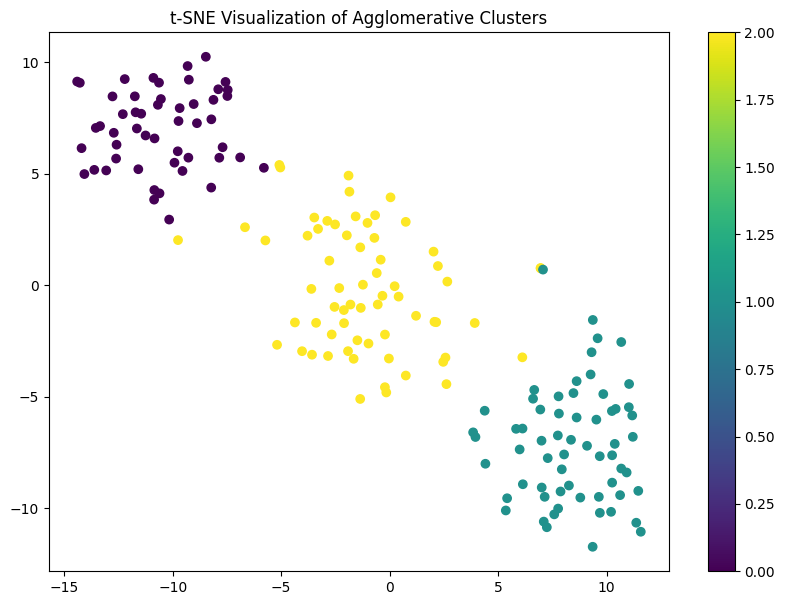

In [38]:
# Cell 8: t-SNE Visualization of Clusters
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(wine_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Agglomerative Clusters')
plt.show()